# Top Spotify Songs of 2018

<font size="4">_Audio features of top Spotify songs_</font>

### Task Desctiption

At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. This year's playlist (Top Tracks of 2018) includes 100 songs. 

**The question is: What do these top songs have in common? Why do people like them?**

Original Data Source: The audio features for each song were extracted using the Spotify Web API and the spotipy Python library. Credit goes to Spotify for calculating the audio feature values.

**Exploring the Data: Some suggestions for what to do with the data:**
- Look for patterns in the audio features of the songs. Why do people stream these songs the most?
- Try to predict one audio feature based on the others
- See which features correlate the most

### Data Description

- `id`: Spotify URI of the song
- `name`: Name of the song
- `artists`: Artist(s) of the song
- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- `loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- `duration_ms`: The duration of the track in milliseconds.
- `time_signature`: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

### Importing The Tools

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
sns.set()

### Loading The Data

In [2]:
top_songs = pd.read_csv("./datasets/top-spotify-tracks-of-2018.zip")

### Exploratory Data Analysis

#### General info on the dataset

In [5]:
top_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [6]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


Firsty, let's analyse the data column by column to get a general idea of what it represents.

#### `Name`

What can be explored about the name of the song?
- Length of the song name in characters
 - **Answer**: Mostly ranging from 1 to ~15 characters. 
- Length of the song name in words
 - **Answer**: Mostly songs with 1-2-3 words in their name.
- Presence of `"feat."` – we can calculate how many co-op songs make it to the top, for example. Because as we can see in the data, each song is corresponding to single artist. However, the song may be a collaboration, as denoted by the `"feat."` mark in the title
 - **Answer**: Most of the songs are not collabs.

Text(0.5,1,'Length of the song name in characters')

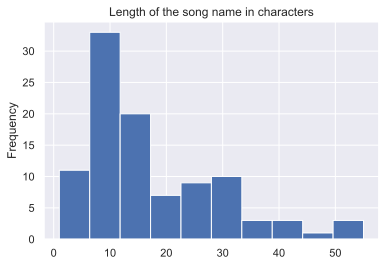

In [105]:
top_songs["name_len"] = top_songs["name"].apply(lambda x: len(x))
top_songs["name_len"].plot(kind="hist")
plt.title("Length of the song name in characters")

Let's write a function that clears the song names from `<feat.>` and `<with>` words and extracts useful information – either the original song title, or its length in words, or the name of a collaborator.

In [102]:
def get_additional_info_from_songname(songname, info_needed = "songname"):
    """
    Accepts:
        songname (str). String from dataframe.
        info_needed (str). Either "songname" (cleaned from <feat.> and <with>) or 
                           "coauthor" (in colab with whom this song was recorded) or
                           "wordcount" (how many words the title contains)
    Splits it.
    Finds <(feat.> and <(with> parts.
    Gets rid of them.
    Returns either the length of a song name without this additional info or the info itself.
    """
    song_components = songname.split()
    
    if "(feat." in song_components:
        if info_needed == "songname":
            return " ".join(song_components[ : song_components.index("(feat.")])
        if info_needed == "coauthor":
            coauth = song_components[song_components.index("(feat.")+1:]
            # this is to get rid of the last parenthesis
            coauth[-1] = coauth[-1][:-1]
            return " ".join(coauth)
        if info_needed == "wordcount":
            return len(song_components[ : song_components.index("(feat.")])
    elif "(with" in song_components:
        if info_needed == "songname":
            return " ".join(song_components[ : song_components.index("(with")])
        if info_needed == "coauthor":
            coauth = song_components[song_components.index("(with")+1:]
            # this is to get rid of the last parenthesis
            coauth[-1] = coauth[-1][:-1]
            return " ".join(coauth)
        if info_needed == "wordcount":
            return len(song_components[ : song_components.index("(with")])
    else:
        # if there was no feat. or with in the song title
        if info_needed == "songname":
            return songname
        elif info_needed == "coauthor":
            return "No colab"
        elif info_needed == "wordcount":
            return len(songname.split())

In [95]:
top_songs["clean_name"] = top_songs["name"].apply(
                            lambda x: get_additional_info_from_songname(x, 
                                                                        info_needed="songname"))

top_songs["name_wordcount"] = top_songs["name"].apply(
                                lambda x: get_additional_info_from_songname(x,
                                                                            info_needed="wordcount"))

top_songs["collaborator"] = top_songs["name"].apply(
                                lambda x: get_additional_info_from_songname(x,
                                                                            info_needed="coauthor"))

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

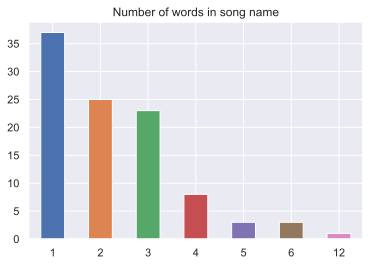

In [143]:
top_songs["name_wordcount"].value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title("Number of words in song name")
plt.xticks(rotation=0)

As we can see, most of the songs have from 1 to 3 words in their name. However, I am curious to see what are the notable outliers with 5, 6, and even 12 words in the name?

In [114]:
top_songs[top_songs["name_wordcount"] > 4]["clean_name"]

16                                 no tears left to cry
46                      Finesse (Remix) [feat. Cardi B]
47    Back To You - From 13 Reasons Why ? Season 2 S...
50                      Ric Flair Drip (& Metro Boomin)
84                  Perfect Duet (Ed Sheeran & Beyonc?)
94                   Everybody Dies In Their Nightmares
98                          Dusk Till Dawn - Radio Edit
Name: clean_name, dtype: object

I've looked through the values in the `clean_names` column and figured out there is still some unclean data. Let's correct it.

We have to correct songs number 21, 46, 47, 84, 98.

In [120]:
top_songs.at[21, "clean_name"] = "Te Bot?"

top_songs.at[46, "clean_name"] = "Finesse (Remix)"
top_songs.at[46, "collaborator"] = "Cardi B"

top_songs.at[47, "clean_name"] = "Back To You"

top_songs.at[84, "clean_name"] = "Perfect"
top_songs.at[84, "collaborator"] = "Beyonce"

top_songs.at[98, "clean_name"] = "Dusk Till Dawn"

That is better.

([<matplotlib.axis.XTick at 0x1a1e8184a8>,
 <a list of 2 Text xticklabel objects>)

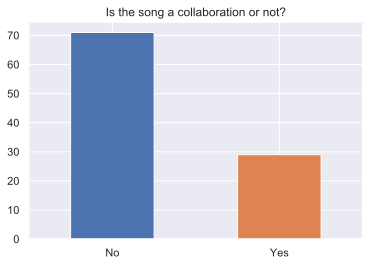

In [141]:
top_songs["is_collab"] = top_songs["collaborator"].apply(lambda x: 0 if x == "No colab" else 1)

top_songs["is_collab"].value_counts().plot(kind="bar")
plt.title("Is the song a collaboration or not?")
plt.xticks([0,1],["No", "Yes"], rotation=0)

So it seems like most of the songs are not collabs! Interesting.

#### `artists`

What can we get from the artists column?
- Are there any artists that have several songs on the Top-100 of 2018? If yes, then how many songs do they have?
 - **Answer**: Yes, there are artists with more than 1 song on the top-list. There is 21 such artists. Most songs were provided by Post Malone and XXXTENTACION (6 each).

In [148]:
top_songs["artists"].value_counts()[top_songs["artists"].value_counts() >= 2]

Post Malone        6
XXXTENTACION       6
Drake              4
Marshmello         3
Ed Sheeran         3
Imagine Dragons    2
Camila Cabello     2
Ariana Grande      2
Maroon 5           2
Khalid             2
Dua Lipa           2
Calvin Harris      2
Kendrick Lamar     2
Selena Gomez       2
The Weeknd         2
Clean Bandit       2
Migos              2
Ozuna              2
Name: artists, dtype: int64

It is interesting, because the count does not include the collabs. So what needs to be done is to count artists in the `collaborator` column and add the numbers to the respected artists in the above Series. I am pretty sure that Cardi B has several collabs, which technically means she is also responsible for the song; however, she has only 1 count in the overall counts.

In [154]:
top_songs["collaborator"].value_counts().head()

No colab                71
Cardi B                  2
Florida Georgia Line     1
Trippie Redd             1
21 Savage                1
Name: collaborator, dtype: int64

In [ ]:
total_number_of_works = top_songs["artists"].value_counts()

for artist, number in top_songs["collaborator"].value_counts().iteritems():
    try:
        total_number_of_works.loc[artist] += number
    except:
        pass

In [167]:
total_number_of_works[total_number_of_works >= 2].sort_values(ascending=False)

Post Malone        6
XXXTENTACION       6
Drake              5
Ed Sheeran         4
Kendrick Lamar     3
Marshmello         3
Khalid             3
Cardi B            3
Dua Lipa           3
Selena Gomez       2
Calvin Harris      2
Sam Smith          2
The Weeknd         2
Maroon 5           2
Ariana Grande      2
Camila Cabello     2
Imagine Dragons    2
Clean Bandit       2
Migos              2
Ozuna              2
Offset             2
Name: artists, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

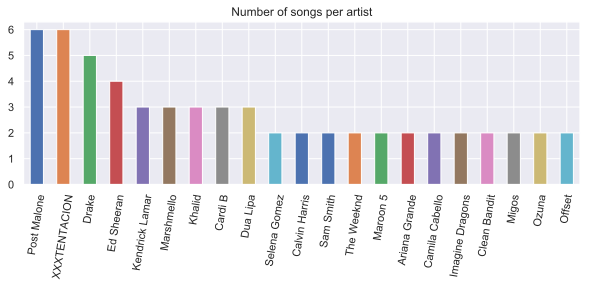

In [177]:
plt.figure(figsize=(10, 3))
total_number_of_works[total_number_of_works >= 2].sort_values(ascending=False).plot(kind="bar")
plt.title("Number of songs per artist")
plt.xticks(rotation=81)

#### `danceability`

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Text(0.5,1,'Distribution of songs danceability')

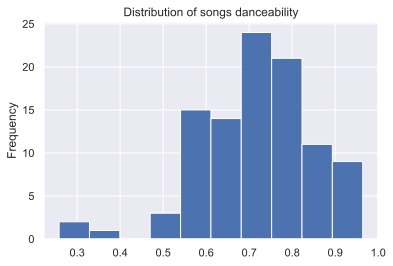

In [181]:
top_songs["danceability"].plot(kind='hist')
plt.title("Distribution of songs danceability")

It can be seen that most of the songs are quite danceable (value being bigger than 0.5). 

Let's take a look at the danceability of the songs of artists with the highest amount of songs.

In [185]:
top_artists = list(total_number_of_works[total_number_of_works >= 2].sort_values(ascending=False).index)

Text(0.5,1,"Danceability of most popular artists' songs")

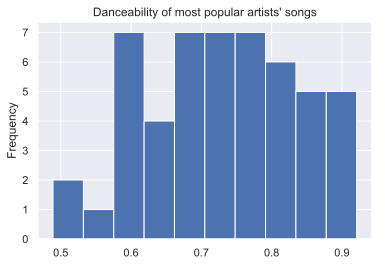

In [192]:
top_songs[top_songs["artists"].isin(top_artists)]["danceability"].plot(kind="hist")
plt.title("Danceability of most popular artists' songs")

Well, danceability surely has to be high enough in order for a song to become popular!

#### `energy`

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

Text(0.5,1,'Energy Distribution')

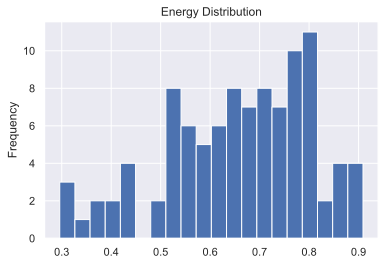

In [207]:
top_songs["energy"].plot(kind='hist', bins=20)
plt.title("Energy Distribution")

Energy distribution doesn't really tell that much – well, it seems a song has to be danceable and quite energetic, in order to become popular. I am interested, however, is there a correlation between danceability and energy? Can a danceable song be not-energetic?

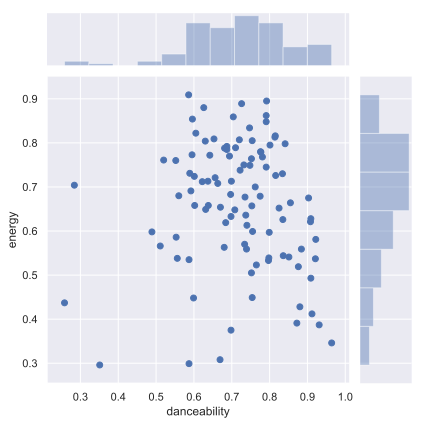

In [228]:
fig = sns.jointplot(x="danceability", y="energy", data=top_songs)
# fig.fig.set_figwidth(10)
# fig.fig.set_figheight(5)

It is interesting to see that high danceability doesn't necessarily mean high energy.

Let's add a hue on whether a certain point on the jointplot corresponds to a song that is made by most popular artists.

In [224]:
top_songs["is_by_top_artist"] = top_songs["artists"].apply(lambda x: 1 if x in top_artists else 0)

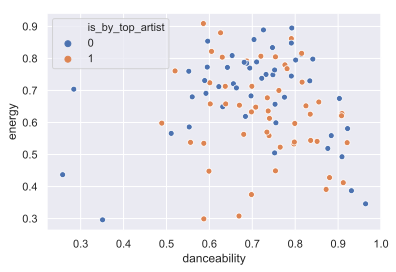

In [227]:
fig = sns.scatterplot(x="danceability", y="energy", data=top_songs, hue="is_by_top_artist")

Seems like most popular artists tend to care more for the danceability of the songs, not really bothering about energy.

#### `key`

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

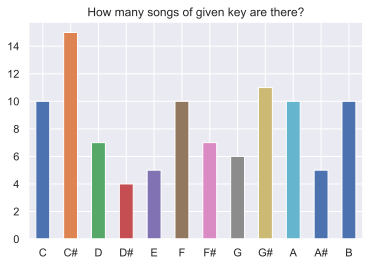

In [238]:
top_songs["key"].value_counts().sort_index().plot(kind="bar")
plt.title("How many songs of given key are there?")
_ = plt.xticks(range(len(top_songs["key"].value_counts().sort_index().index)),
           ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"],
           rotation=0)

We can see that most songs are written in C#, G#, C, F, A, B keys. 

It might be interesting to see whether a key determines a song's danceability or energy or not.

In order to do so, we first need to convert the key variable from numeric to object (for seaborn to correctly identify it as a variable to hue on).

In [241]:
top_songs["key_string"] = top_songs["key"].replace({0: "C", 1: "C#", 2: "D", 3: "D#", 
                                                    4: "E", 5: "F", 6: "F#", 7: "G",
                                                    8: "G#", 9: "A", 10: "A#", 11: "B"})

Text(0.5,1,'Does the key has any influence on danceability / energy of the song?')

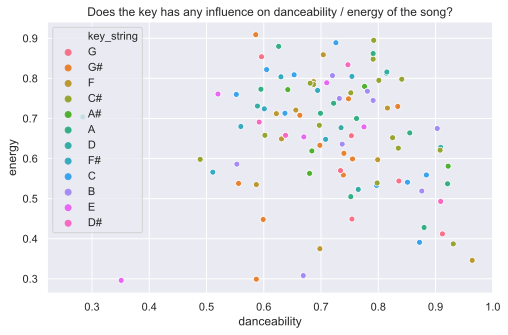

In [280]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="danceability", y="energy", data=top_songs, hue="key_string")
plt.title("Does the key has any influence on danceability / energy of the song?")

There doesn't seem to be any connection.

#### `loudness`

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

Text(0.5,1,'Loudness distribution')

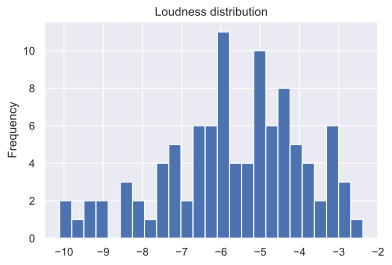

In [281]:
top_songs["loudness"].plot(kind="hist", bins=25)
plt.title("Loudness distribution")

This doesn't tell us much. Maybe there is an interesting correlation, though.

Text(0.5,0.98,'Loudness vs. Energy')

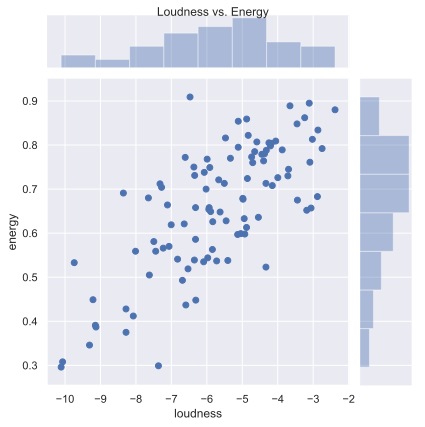

In [289]:
g = sns.jointplot(x="loudness", y="energy", data=top_songs)
g.fig.suptitle("Loudness vs. Energy")

Here we go! This looks interesting. The louder the song, the more energy the song has.

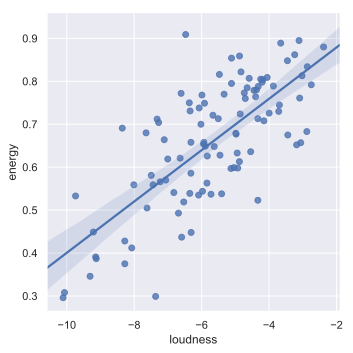

In [279]:
sns.lmplot(x="loudness", y="energy", data=top_songs)

Songs in which key are louder?

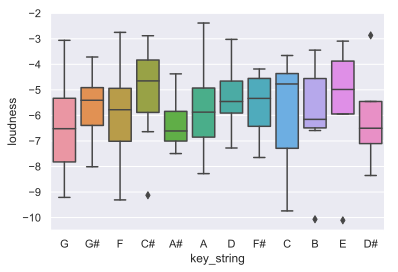

In [292]:
sns.boxplot(x="key_string", y="loudness", data=top_songs)

Usually C#, A#, D, B and E songs are somewhat louder than the rest. Why whould that be?..

#### `mode`

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

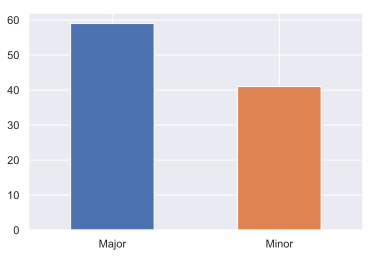

In [310]:
top_songs["mode"].value_counts().plot(kind='bar', color=sns.color_palette("deep", 2))
_ = plt.xticks([0,1],["Major", "Minor"], rotation=0)

I am quite surprised to see that it is somewhat equal between the two. In my mind I thought that maybe major songs will dominate. Guess I was wrong.

Any interesting correlation with either danceability or energy?

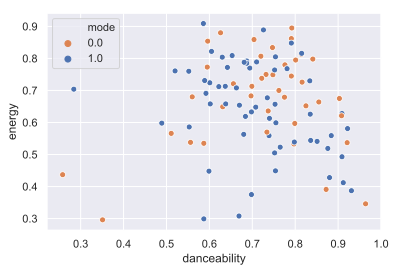

In [311]:
sns.scatterplot(x="danceability", 
                y="energy", 
                data=top_songs, 
                hue="mode", 
                palette=sns.color_palette("deep", 2)[::-1])

Minor songs tend to have more energy and a bit more danceability.

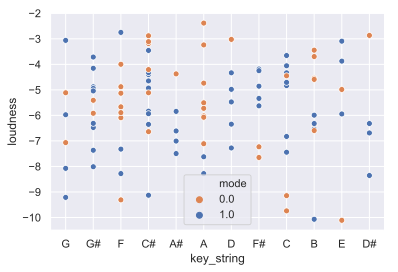

In [341]:
sns.scatterplot(x="key_string", y="loudness", data=top_songs, 
                hue="mode", palette=sns.color_palette("deep", 2)[::-1])

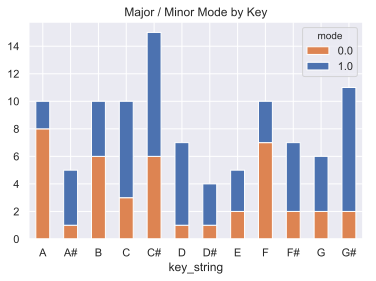

In [342]:
top_songs.groupby(["key_string","mode"]).size().unstack().plot(kind="bar", 
                                                               stacked=True, 
                                                               color = sns.color_palette("deep", 2)[::-1])
_ = plt.xticks(rotation=0)
_ = plt.title("Major / Minor Mode by Key")

So we can see that A, F and B often come in minor mode. 

#### `speechiness`

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

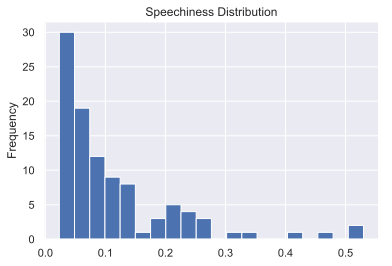

In [369]:
top_songs["speechiness"].plot(kind='hist', bins=20)
_ = plt.title("Speechiness Distribution")

There is something strange about speechiness data; can it really be that most of the songs are instrumental?

I am pretty sure this feature is messed up a little bit. 

#### `acousticness`

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

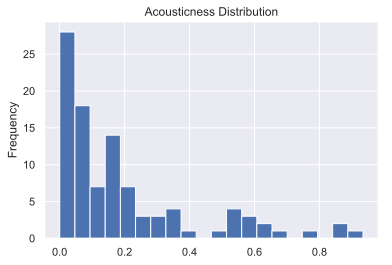

In [370]:
top_songs["acousticness"].plot(kind="hist", bins=20)
_ = plt.title("Acousticness Distribution")

Well, it doesn't seem that people like acoustic songs thet much, really. 

Let's see if all acoustic songs are written in a common key (who knows?)

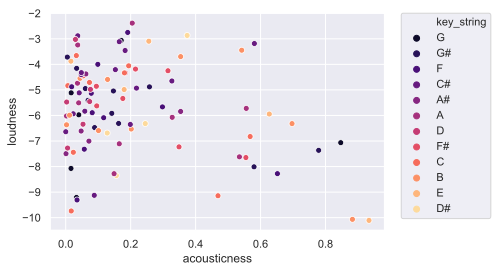

In [356]:
sns.scatterplot(x="acousticness", y="loudness", 
                data=top_songs, hue="key_string",
                palette=sns.color_palette("magma", 12))
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It doesn't seem so. But acoustic songs are definitely much more quiet than non-acoustic ones.

No handles with labels found to put in legend.


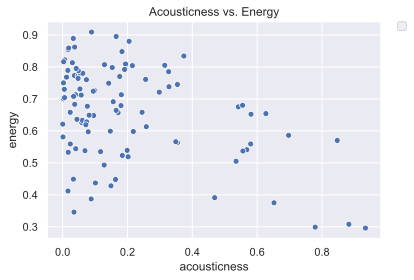

In [371]:
sns.scatterplot(x="acousticness", y="energy", 
                data=top_songs)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_ = plt.title("Acousticness vs. Energy")

Well, obivously, the more acoustic a song is, the less energy it has, and the more quiet it gets.

#### `liveness`

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

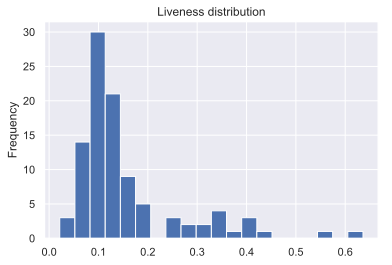

In [372]:
top_songs["liveness"].plot(kind="hist", bins=20)
_ = plt.title("Liveness distribution")

There doesn't seem to be many live-versions of the songs. Which is explainable, I think people like the studio quality of sound the most. 

#### `valence`

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

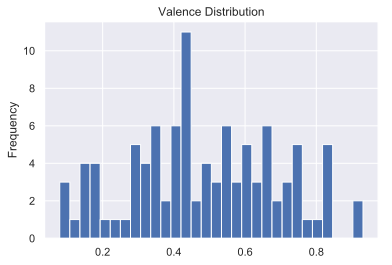

In [373]:
top_songs["valence"].plot(kind="hist", bins=30)
_ = plt.title("Valence Distribution")

This is interesting – looks like it is more possible to have a sad or angry song... Neutral at best.

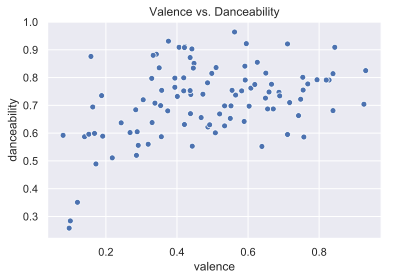

In [374]:
sns.scatterplot(x="valence", y="danceability", data=top_songs)
_ = plt.title("Valence vs. Danceability")

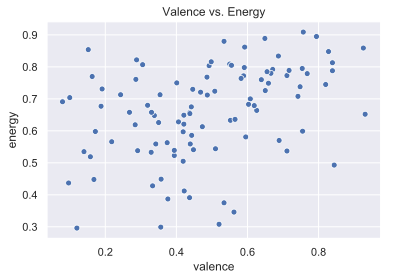

In [375]:
sns.scatterplot(x="valence", y="energy", data=top_songs)
_ = plt.title("Valence vs. Energy")

Happier songs tend to get more energetic. 

#### `tempo`

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

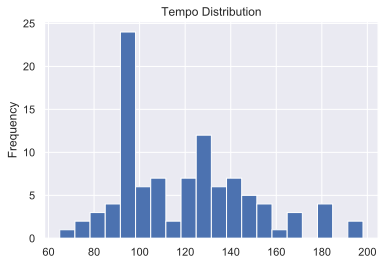

In [391]:
top_songs["tempo"].plot(kind="hist", bins=20)
_ = plt.title("Tempo Distribution")

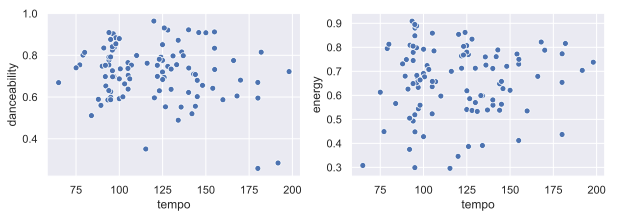

In [390]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.scatterplot(x="tempo", y="danceability", data=top_songs, ax=ax[0])
sns.scatterplot(x="tempo", y="energy", data=top_songs, ax=ax[1])

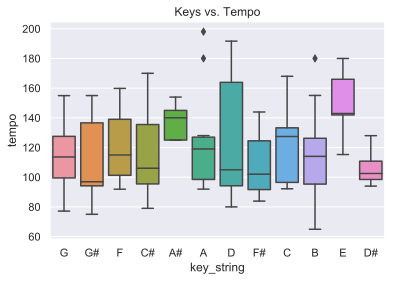

In [394]:
sns.boxplot(x="key_string", y="tempo", data=top_songs)
_ = plt.title("Keys vs. Tempo")

Contrary to my belief, tempo doesn't have that much of interesting correlations with other variables.

#### `duration_ms`

The duration of the track in milliseconds.

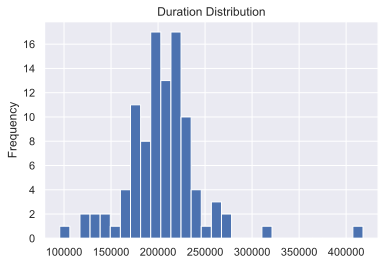

In [399]:
top_songs["duration_ms"].plot(kind="hist", bins=30)
_ = plt.title("Duration Distribution")

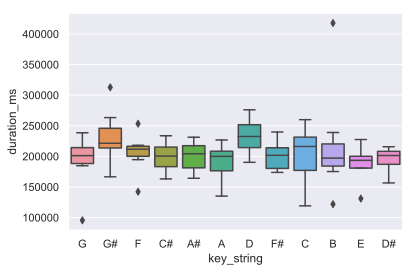

In [403]:
sns.boxplot(x="key_string", y="duration_ms", data=top_songs)

TODO: Finish the analysis.